In [1]:
# Census Income
# Samrat Dey
# Batch - DS2312

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This dataset includes the weights on the Current Population Survey (CPS) files which are controlled to independent estimates of the civilian non-institutional population of the US where both numerical and categorical data are present. Here 'Income' is the target variable which contains 2 categories(<=50K and >50K), so it will be temed as 'Classification Problem' where we need to predict whether a person makes over $50K a year or not.

In [4]:
df.shape

(32560, 15)

The dataset contains 32560 rows and 15 columns. Out of which 1 column is the taraget variable and the remaining 14 columns are independent variables

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are two different types of data (object and int64) present in the dataset

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

<Axes: >

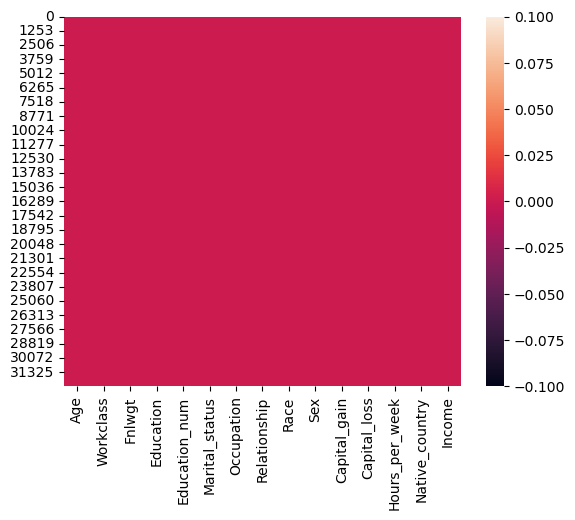

In [12]:
sns.heatmap(df.isnull())

In [13]:
# Seperating numerical and categorical columns
# Checking for categorical column
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns are:",cat_col)
print("\n")

# Checking for numerical column
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns are:",num_col)
print("\n")

Categorical Columns are: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical Columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




In [14]:
# Statistical summary of numerical columns
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is greater than the median(50%) in 'all the columns, which means the data is skewed to right in these columns
3. By summerizing the data we can observe that there are difference between 75% and max in all the columns, hence there are outliers present in the data

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


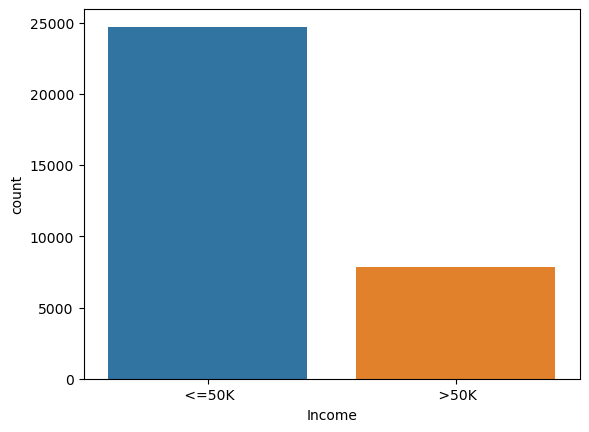

In [15]:
# Visualize the Income of people
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


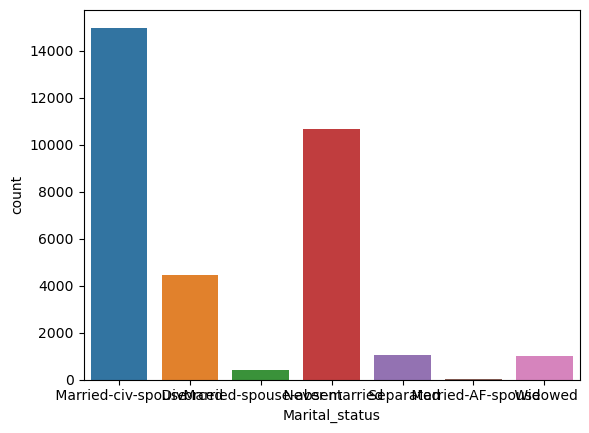

In [16]:
# Visualize the Marital Status
ax=sns.countplot(x='Marital_status',data=df)
print(df['Marital_status'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


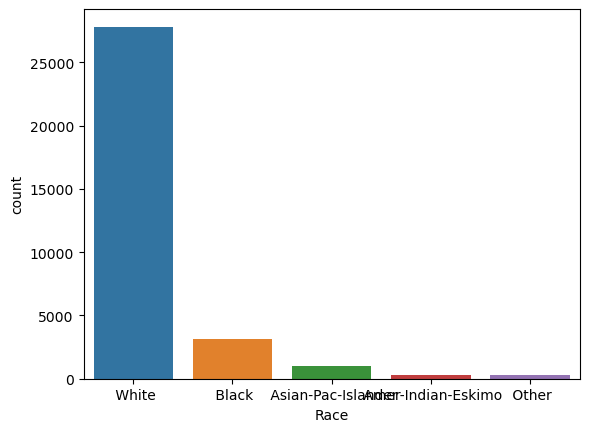

In [17]:
# Visualize that Race
ax=sns.countplot(x='Race',data=df)
print(df['Race'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


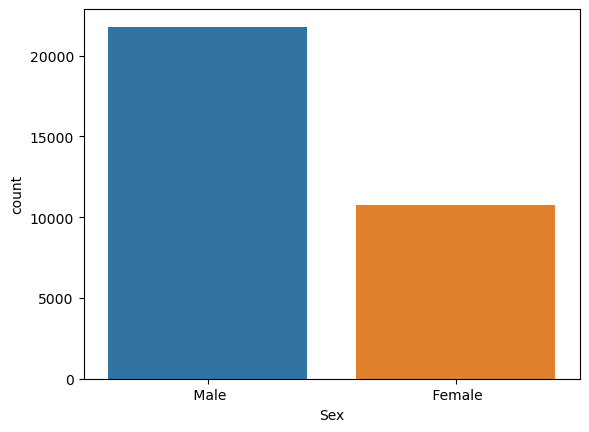

In [18]:
# Visualize the Sex
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

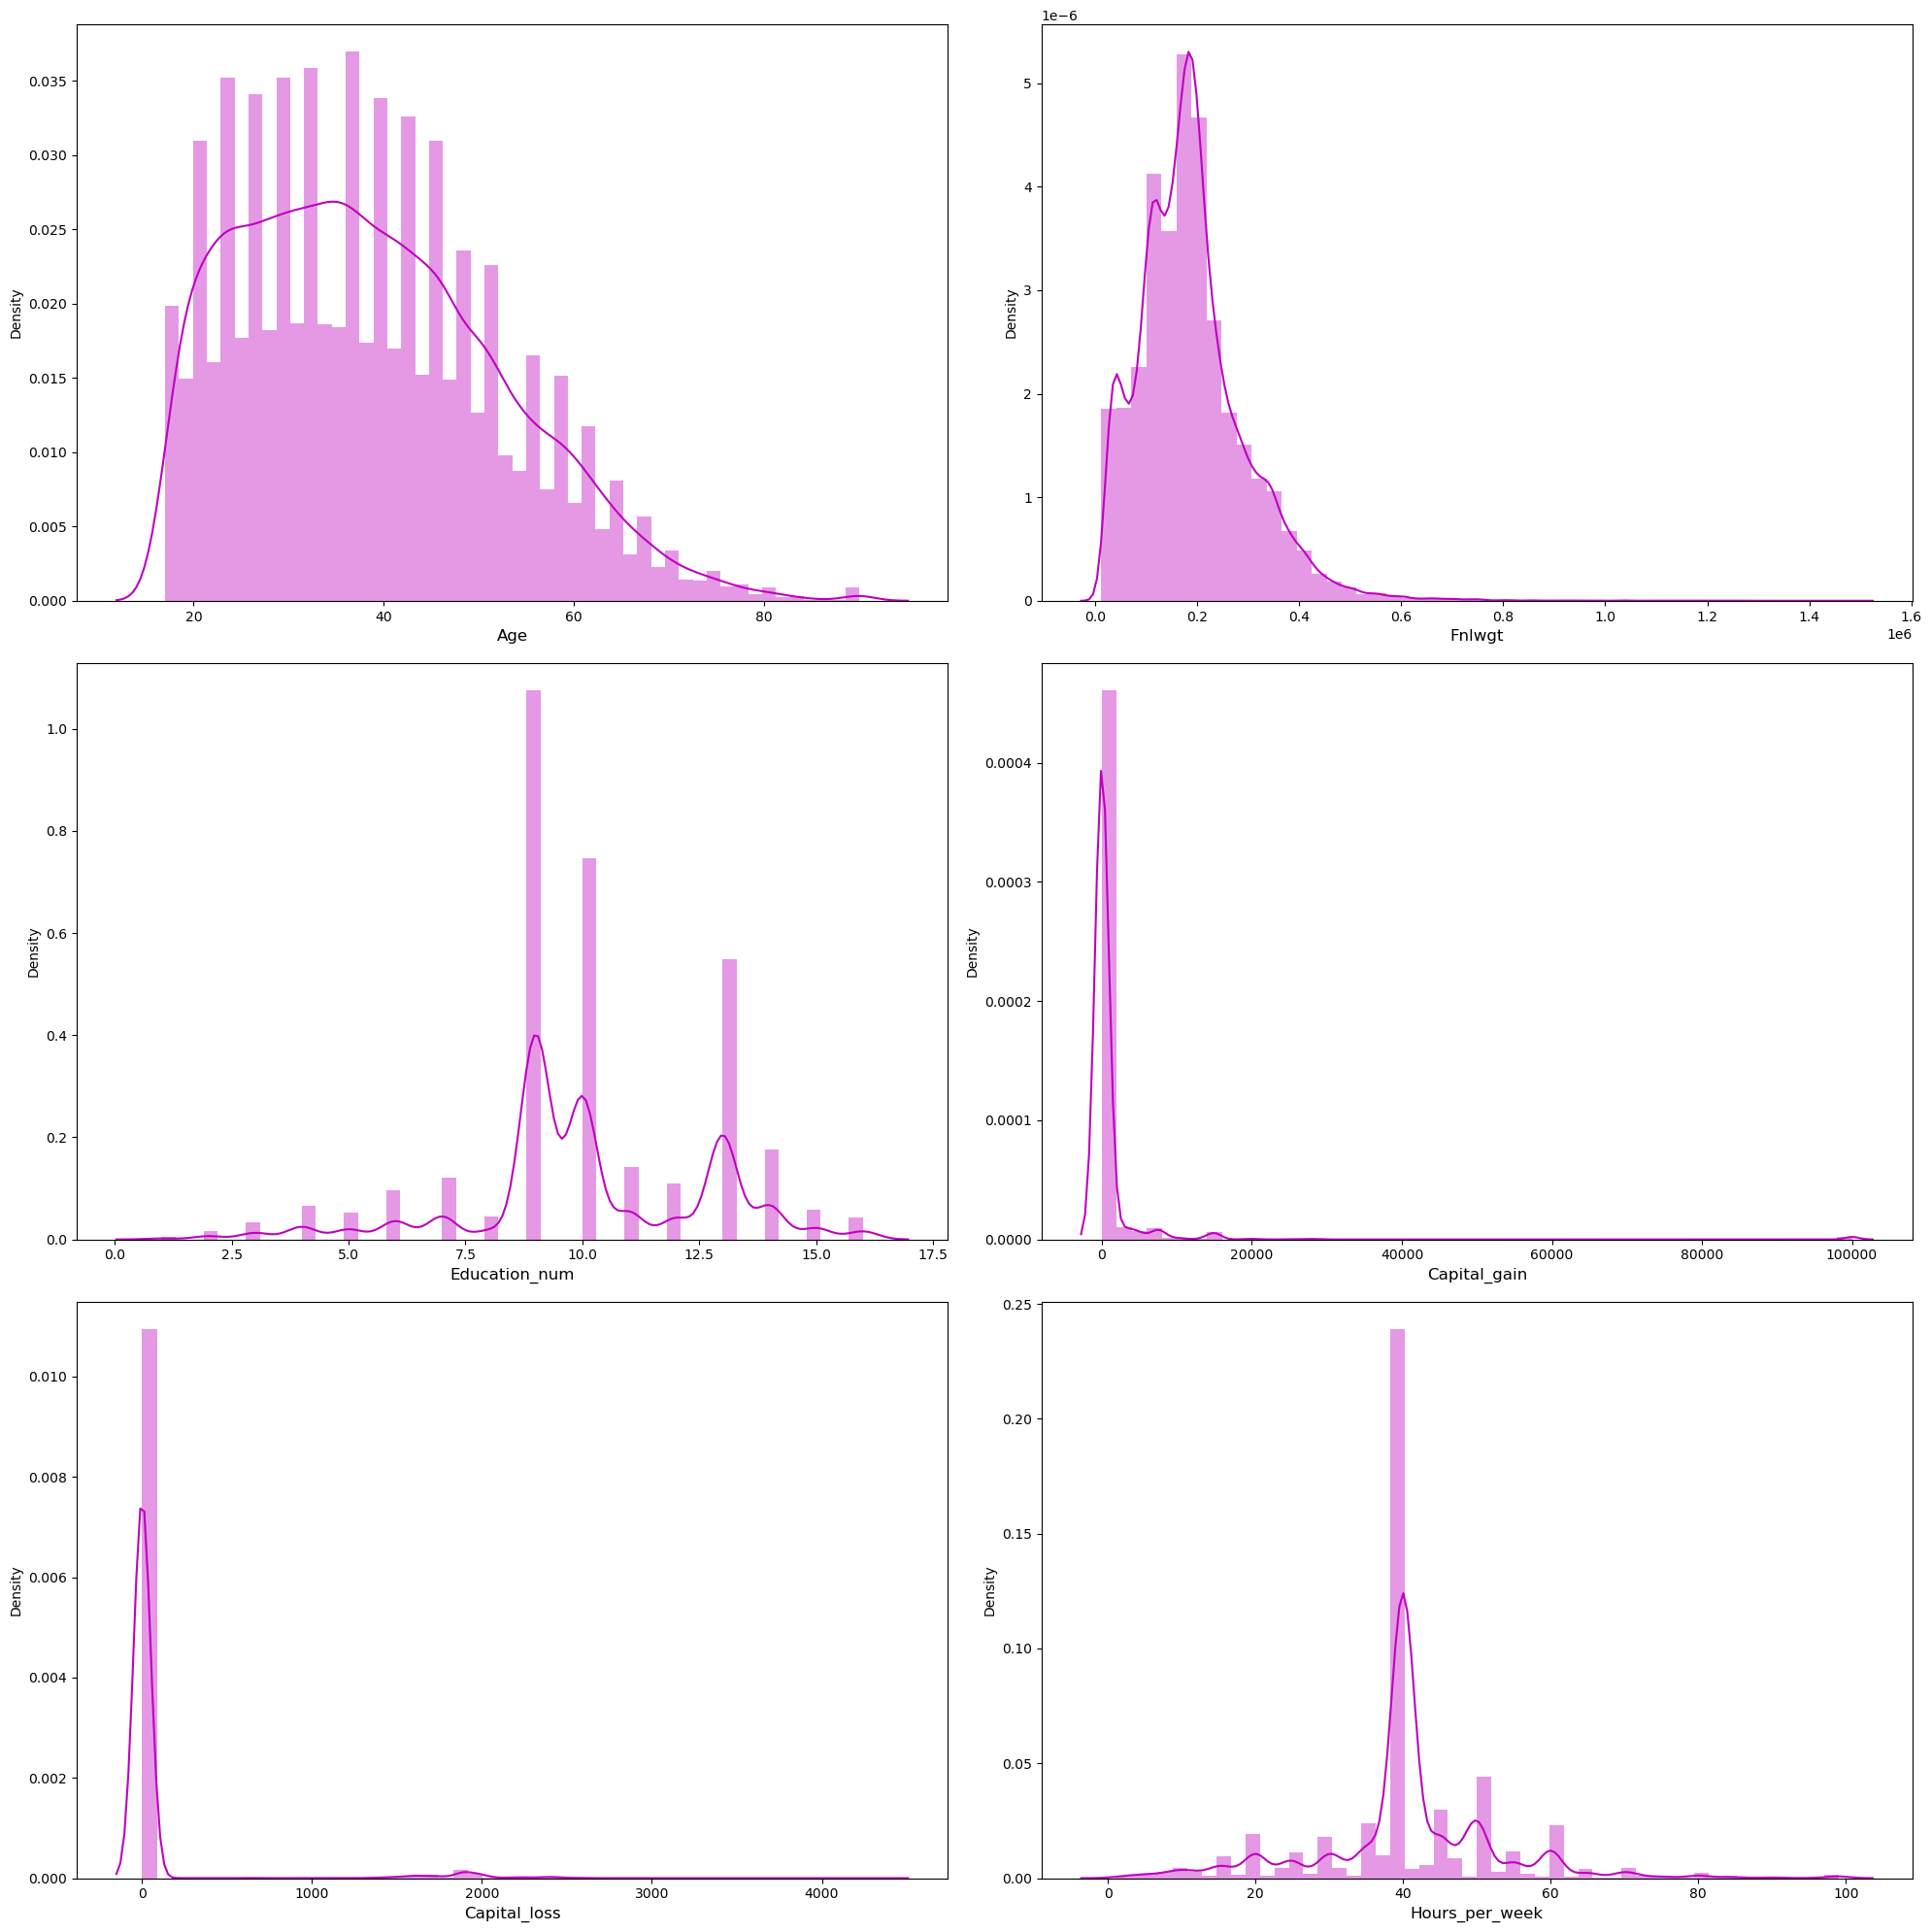

In [19]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

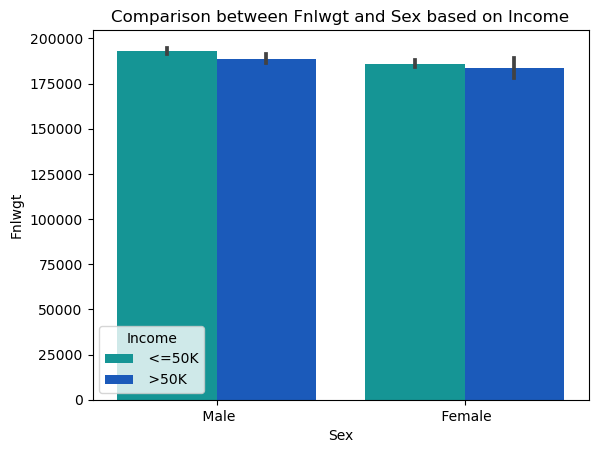

In [20]:
# Comparing Fnlwgt and Sex on the basis of Income
plt.title("Comparison between Fnlwgt and Sex based on Income")
sns.barplot(x="Sex",y="Fnlwgt",data=df,palette="winter_r",hue="Income")
plt.show()

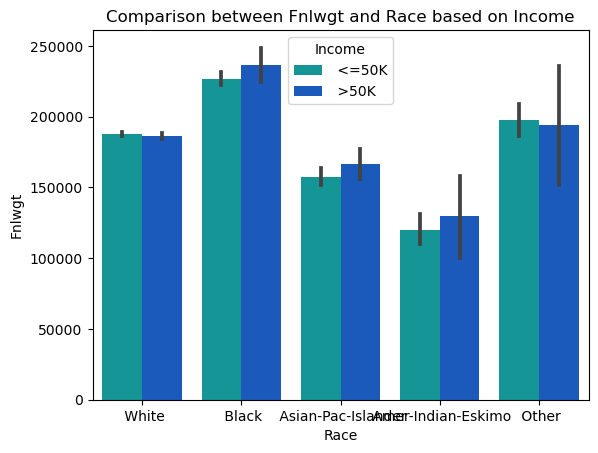

In [21]:
# Comparing Fnlwgt and Race on the basis of Income
plt.title("Comparison between Fnlwgt and Race based on Income")
sns.barplot(x="Race",y="Fnlwgt",data=df,palette="winter_r",hue="Income")
plt.show()

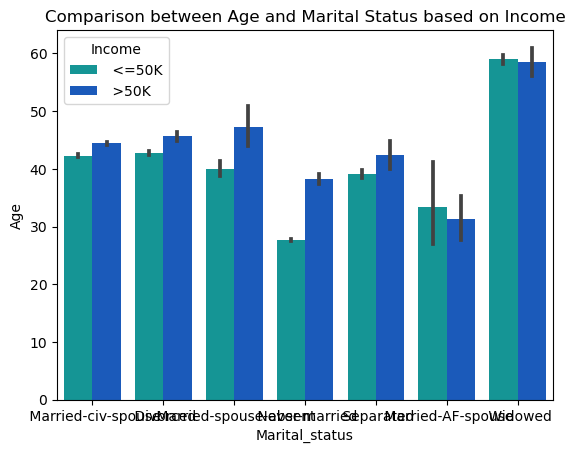

In [22]:
# Comparing Age and Marital Status on the basis of Income
plt.title("Comparison between Age and Marital Status based on Income")
sns.barplot(x="Marital_status",y="Age",data=df,palette="winter_r",hue="Income")
plt.show()

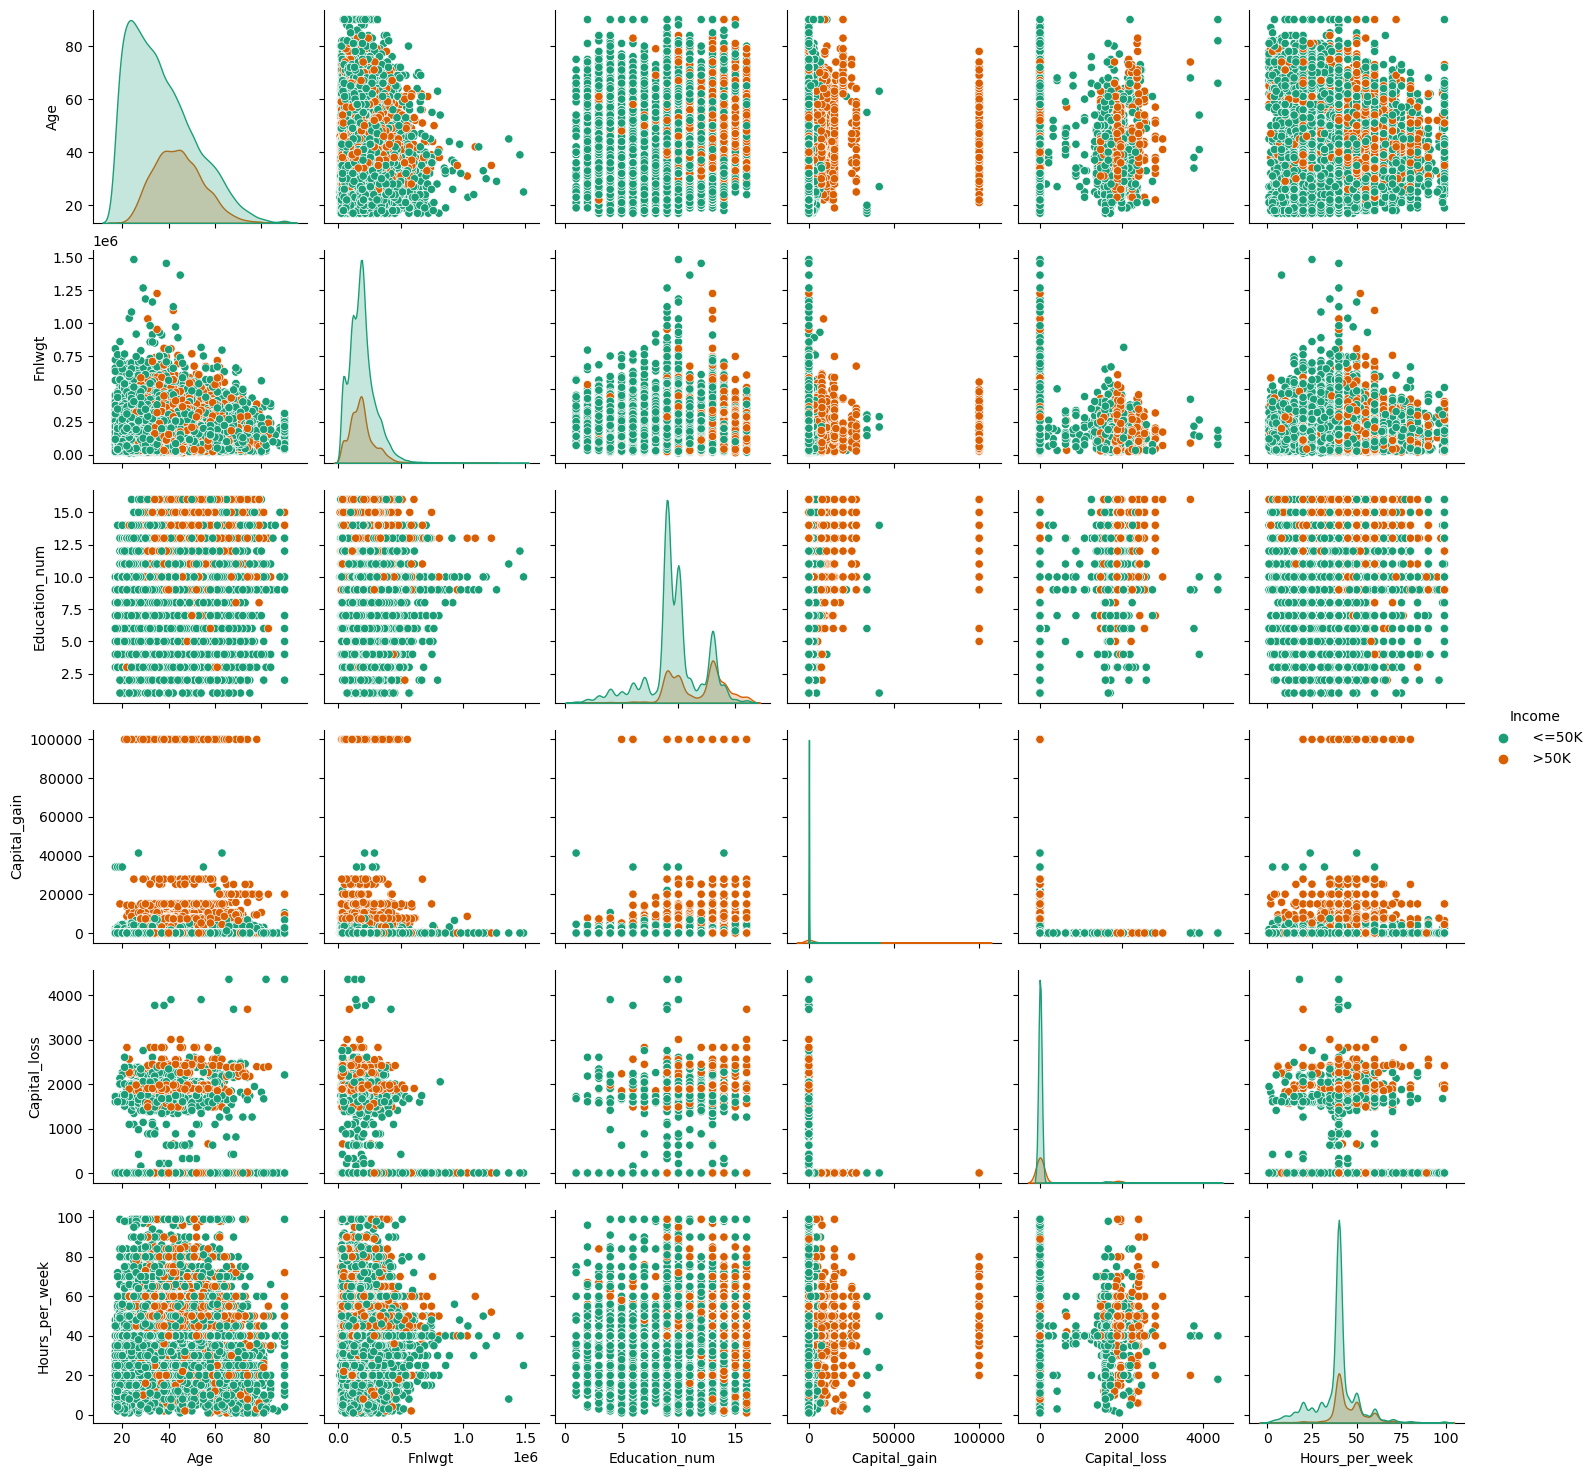

In [23]:
sns.pairplot(df,hue="Income",palette="Dark2")
plt.show()

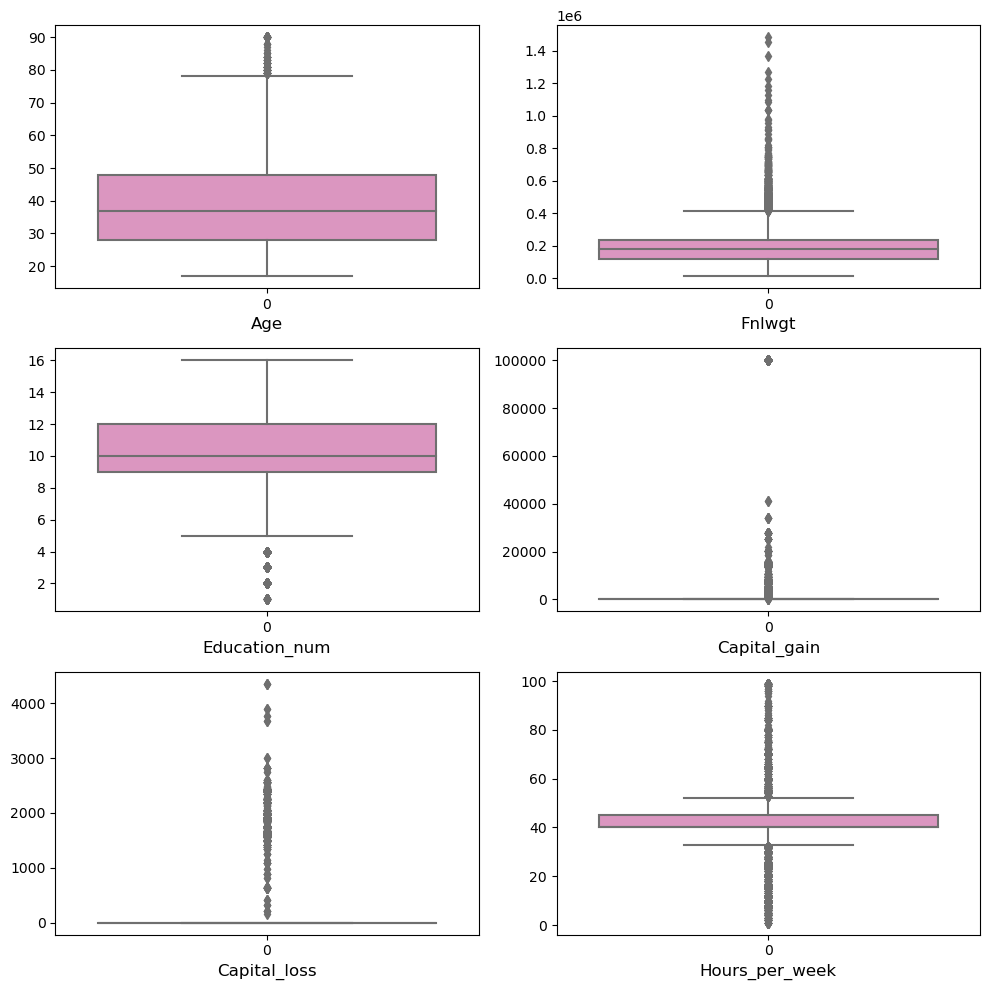

In [24]:
# Checking for outliers by plotting boxplpot
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [25]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

The columns Capital_gain and Capital_loss have skewness in the data and we apply cuberoot method on Capital_gain to remove skewness

In [26]:
df["Capital_gain"]=np.cbrt(df["Capital_gain"])

In [27]:
df.skew()

Age               0.558738
Fnlwgt            1.446972
Education_num    -0.311630
Capital_gain      4.100150
Capital_loss      4.594549
Hours_per_week    0.227636
dtype: float64

TThe columns Capital_gain and Capital_loss still have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [28]:
df["Capital_gain"]=np.cbrt(df["Capital_gain"])
df["Capital_loss"]=np.cbrt(df["Capital_loss"])

In [29]:
df.skew()

Age               0.558738
Fnlwgt            1.446972
Education_num    -0.311630
Capital_gain      3.103182
Capital_loss      4.336999
Hours_per_week    0.227636
dtype: float64

The columns still have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [30]:
df["Capital_loss"]=np.cbrt(df["Capital_loss"])

In [31]:
df.skew()

Age               0.558738
Fnlwgt            1.446972
Education_num    -0.311630
Capital_gain      3.103182
Capital_loss      4.304693
Hours_per_week    0.227636
dtype: float64

In [32]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0.000000,0.0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0.000000,0.0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0.000000,0.0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0.000000,0.0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0.000000,0.0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0.000000,0.0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0.000000,0.0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0.000000,0.0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0.000000,0.0,20,39.0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  float64
 11  Capital_loss    32560 non-null  float64
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 3.7 MB


In [34]:
# Statistical summary of numerical columns
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,0.223301,0.107490,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,0.746508,0.486105,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,3.593810,2.537132,99.000000,41.000000,1.000000


In [35]:
# Checking the correlation between features and target
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.124053,0.051320,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.022544,0.010504,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,-0.004311,-0.009114,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.024962,0.016615,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.128943,0.077027,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.066378,-0.036006,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.019953,0.018815,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.083015,-0.057148,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.023949,0.018306,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.068712,0.042311,0.229312,-0.008125,0.215995


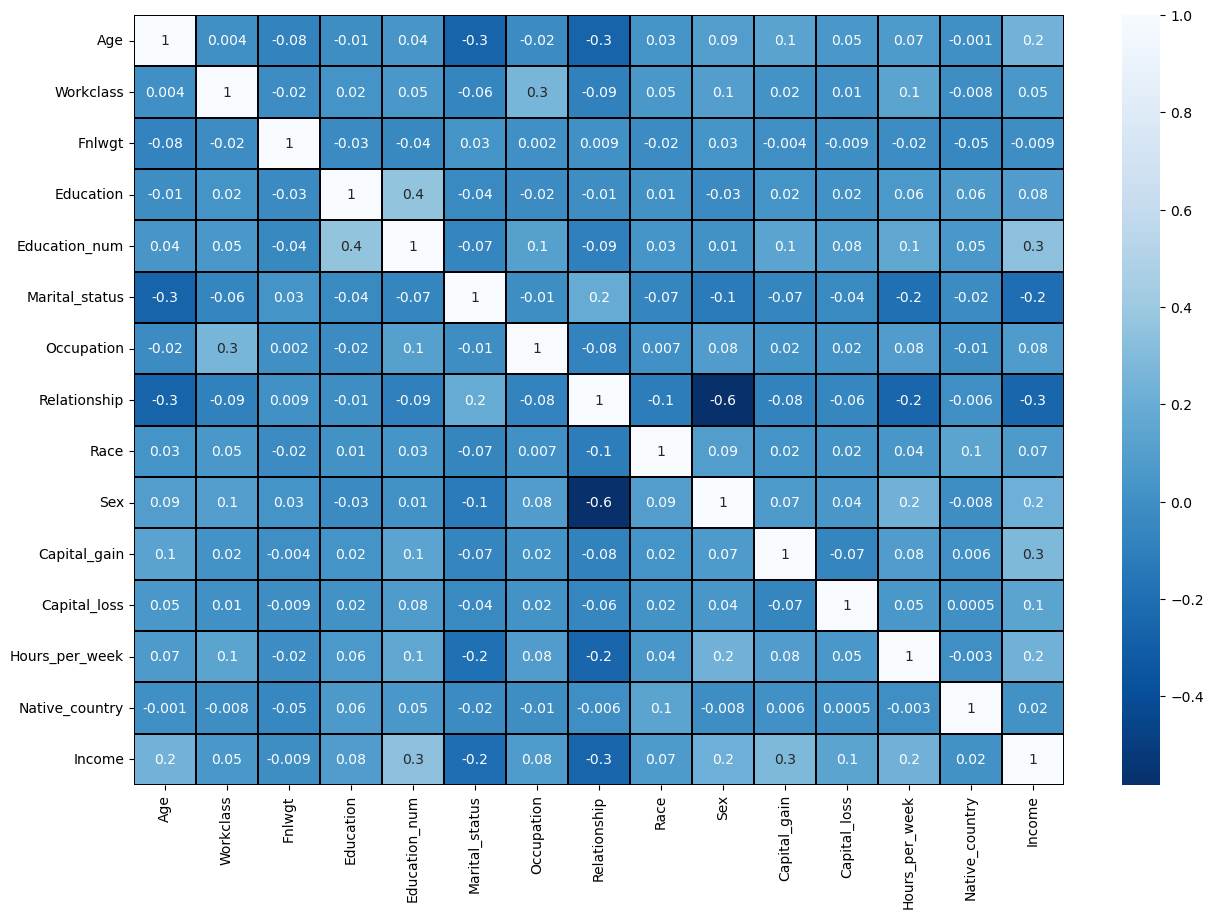

In [36]:
# Visualizing the correlation matrix by plotting the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [37]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Capital_gain      0.288865
Age               0.234039
Hours_per_week    0.229690
Sex               0.215995
Capital_loss      0.140690
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

We observe positive and negative correlated features with the target

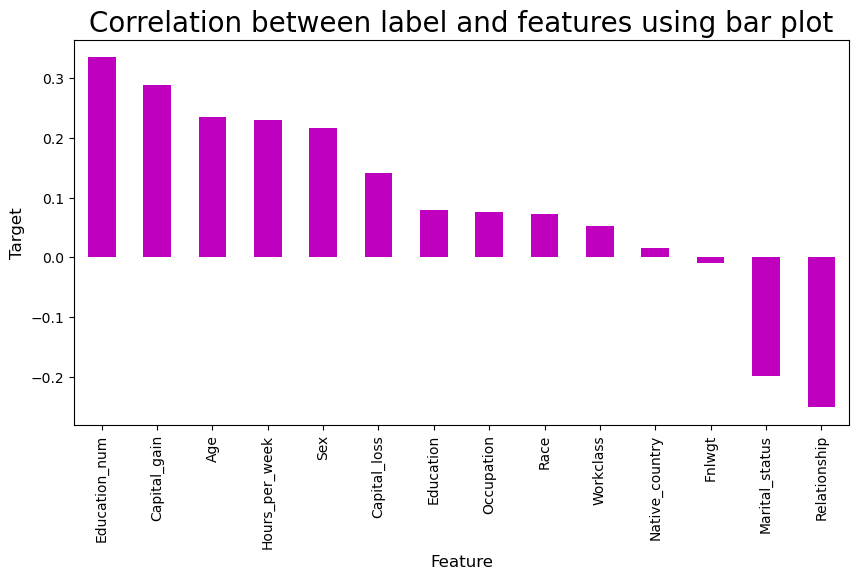

In [38]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(10,5))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Correlation between label and features using bar plot", fontsize=20)
plt.show()

In [39]:
# Separating features and label
x=df.drop("Income",axis=1)
y=df["Income"]

In [40]:
# Feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.463883,-1.008742,-0.335443,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.299132,-0.221128,-2.222120,0.291573
1,-0.042640,0.090121,0.245046,0.181319,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.299132,-0.221128,-0.035430,0.291573
2,1.057031,0.090121,0.425770,-2.402489,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.299132,-0.221128,-0.035430,0.291573
3,-0.775755,0.090121,1.408146,-0.335443,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.299132,-0.221128,-0.035430,-4.054157
4,-0.115952,0.090121,0.898170,0.439700,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.299132,-0.221128,-0.035430,0.291573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.090121,0.639710,-0.852204,0.746077,-0.406183,1.519858,2.211658,0.393675,-1.422298,-0.299132,-0.221128,-0.197407,0.291573
32556,0.103982,0.090121,-0.335466,0.181319,-0.420027,-0.406183,0.100997,-0.900177,0.393675,0.703087,-0.299132,-0.221128,-0.035430,0.291573
32557,1.423589,0.090121,-0.358811,0.181319,-0.420027,2.249503,-1.317864,1.589291,0.393675,-1.422298,-0.299132,-0.221128,-0.035430,0.291573
32558,-1.215624,0.090121,0.110927,0.181319,-0.420027,0.921660,-1.317864,0.966924,0.393675,0.703087,-0.299132,-0.221128,-1.655200,0.291573


In [41]:
# Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.167817,Age
1,1.093707,Workclass
2,1.012274,Fnlwgt
3,1.159574,Education
4,1.220729,Education_num
5,1.127753,Marital_status
6,1.091871,Occupation
7,1.682661,Relationship
8,1.038399,Race
9,1.560422,Sex


In [42]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

Here the data is not balanced. Since it is a classification problem, we will balance the data using over sampling method

In [43]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [44]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [45]:
y1.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

In [69]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccu=0
maxrs=0
for i in range (1,1700):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.05,random_state=1)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy is",maxaccu,"at random_state",maxrs)

Best Accuracy is 0.912621359223301 at random_state 806


The best accuracy is 91.26% at random_state 806

In [70]:
# Classification Algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [71]:
# Checking accuracy for Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9077669902912622
[[1129  127]
 [ 101 1115]]
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1256
         1.0       0.90      0.92      0.91      1216

    accuracy                           0.91      2472
   macro avg       0.91      0.91      0.91      2472
weighted avg       0.91      0.91      0.91      2472



The accuracy for this model is 90.77%

In [72]:
# Checking accuracy for Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7706310679611651
[[960 296]
 [271 945]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      1256
         1.0       0.76      0.78      0.77      1216

    accuracy                           0.77      2472
   macro avg       0.77      0.77      0.77      2472
weighted avg       0.77      0.77      0.77      2472



The accuracy score using Logistic Regression is 77.06%

In [73]:
# Checking accuracy for Gradient Boosting Classifier
GB=LogisticRegression()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7706310679611651
[[960 296]
 [271 945]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      1256
         1.0       0.76      0.78      0.77      1216

    accuracy                           0.77      2472
   macro avg       0.77      0.77      0.77      2472
weighted avg       0.77      0.77      0.77      2472



The accuracy for this model is 77.06%

In [74]:
# Checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.8406148867313916
[[ 978  278]
 [ 116 1100]]
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1256
         1.0       0.80      0.90      0.85      1216

    accuracy                           0.84      2472
   macro avg       0.85      0.84      0.84      2472
weighted avg       0.85      0.84      0.84      2472



The accuracy for this model is 84.06%

In [75]:
# Checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8511326860841424
[[1042  214]
 [ 154 1062]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1256
         1.0       0.83      0.87      0.85      1216

    accuracy                           0.85      2472
   macro avg       0.85      0.85      0.85      2472
weighted avg       0.85      0.85      0.85      2472



The accuracy for this model is 85.11%

In [76]:
# Checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.883495145631068
[[1110  146]
 [ 142 1074]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1256
         1.0       0.88      0.88      0.88      1216

    accuracy                           0.88      2472
   macro avg       0.88      0.88      0.88      2472
weighted avg       0.88      0.88      0.88      2472



The accuracy for this model is 88.35%

In [77]:
# Checking accuracy for ExtraTrees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9142394822006472
[[1125  131]
 [  81 1135]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      1256
         1.0       0.90      0.93      0.91      1216

    accuracy                           0.91      2472
   macro avg       0.91      0.91      0.91      2472
weighted avg       0.91      0.91      0.91      2472



The accuracy for this model is 91.42%

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
# Checking cv score for a Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predRFC)-score.mean())

[0.83495146 0.88036003 0.92860032 0.93273996 0.93172853]
0.9016760612559462
Differrence between accuracy score and cross validation score is 0.0060909290353159395


In [80]:
# Checking cv score for a Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predLR)-score.mean())

[0.76142799 0.76527104 0.7710356  0.76211186 0.76919187]
0.7658076720010553
Differrence between accuracy score and cross validation score is 0.004823395960109833


In [81]:
# Checking cv score for a Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predGB)-score.mean())

[0.76142799 0.76527104 0.7710356  0.76211186 0.76919187]
0.7658076720010553
Differrence between accuracy score and cross validation score is 0.004823395960109833


In [82]:
# Checking cv score for a SVM Classifier
score=cross_val_score(SVC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predSVC)-score.mean())

[0.82686084 0.82959142 0.84233414 0.83999191 0.84545363]
0.8368463884614592
Differrence between accuracy score and cross validation score is 0.0037684982699324188


In [83]:
# Checking cv score for a AdaBoost Classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predABC)-score.mean())

[0.81512945 0.8440534  0.86357201 0.86416507 0.86264792]
0.8499135682238419
Differrence between accuracy score and cross validation score is 0.0012191178603004893


In [84]:
# Checking cv score for a Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predBC)-score.mean())

[0.80157767 0.85871764 0.91666667 0.92029938 0.91392738]
0.8822377473050651
Differrence between accuracy score and cross validation score is 0.001257398326002912


In [86]:
# Checking cv score for a ExtrTrees Classifier
score=cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predETC)-score.mean())

[0.86872977 0.89401294 0.92870146 0.9314251  0.93051482]
0.9106768191731616
Differrence between accuracy score and cross validation score is 0.0035626630274856463


AdaBoost Classifier is our best model as the difference between accuracy score and cross validation score is least

# Hyper Parameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[50],'learning_rate':[1.0],'algorithm':['SAMME.R']}

In [109]:
GCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [1.0],
                         'n_estimators': [50]})

In [111]:
GCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}

In [117]:
Final_model=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.11326860841424


# Plotting ROC and AUC for all the models used

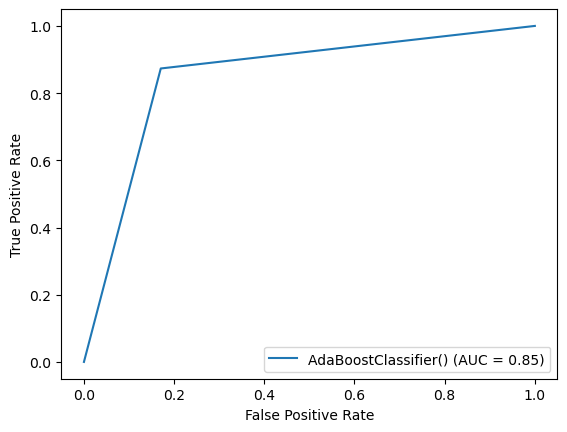

In [118]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

Here we have plotted the ROC curve for the Final model and AUC value for the best model is 85.11%

In [119]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Census_Income.pkl")

['Census_Income.pkl']

In [120]:
# Predicting the saved model
model=joblib.load("Census_Income.pkl")
prediction=model.predict(x_test)
prediction

array([1., 0., 0., ..., 1., 0., 0.])

In [121]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2467,0.0,1.0
2468,1.0,1.0
2469,1.0,0.0
2470,0.0,0.0
